# Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import nfl_data_py as nfl

# Pass Analysis

In [3]:
seasons = range(2016, 2023 + 1)
df_pbp = nfl.import_pbp_data(seasons) 

2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
Downcasting floats.


In [4]:
df_passes = df_pbp.query("play_type == 'pass' & air_yards.notnull()").reset_index()
df_passes = df_passes.query("season_type == 'REG'")  # remove playoff numbers

In [5]:
df_passes.head()

,index,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,3,85.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,...,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",3.0,41302;40078;38540;35553;43295;38582;40053;4336...,00-0029892;00-0027714;00-0032965;00-0029893;00...,00-0031171;00-0029542;00-0029566;00-0030073;00...,11.0,11.0
1,5,130.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,...,I_FORM,"2 RB, 1 TE, 2 WR",7.0,"4 DL, 3 LB, 4 DB",5.0,40078;38540;41302;35553;38582;43295;40053;4336...,00-0029892;00-0027714;00-0032965;00-0029893;00...,00-0029542;00-0031171;00-0029566;00-0030073;00...,11.0,11.0
2,9,216.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BUF,away,...,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",4.0,34479;40111;41277;37249;41230;36089;37100;3567...,00-0027004;00-0030046;00-0028112;00-0031325;00...,00-0031170;00-0027560;00-0027965;00-0031296;00...,11.0,10.0
3,11,261.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BUF,away,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"1 DL, 5 LB, 5 DB",3.0,34479;40111;41277;37249;41230;36089;40112;3710...,00-0027004;00-0030046;00-0028112;00-0031325;00...,00-0031170;00-0027560;00-0027965;00-0031296;00...,10.0,10.0
4,13,310.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,...,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"4 DL, 3 LB, 4 DB",4.0,38540;41302;35553;38582;43295;40053;43369;4011...,00-0027714;00-0032965;00-0029893;00-0026223;00...,00-0029542;00-0031171;00-0029566;00-0030073;00...,11.0,11.0


A *long pass* is a pass that is 20+ yards, and a *short pass* as less than 20 yards.

In [6]:
df_passes["pass_length_air_yards"] = np.where(
      df_passes["air_yards"] >= 20, "long", "short"
)

In [7]:
df_passes["passing_yards"] = np.where(
          df_passes["passing_yards"].isnull(), 0,
          df_passes["passing_yards"]
        )

In [8]:
df_passes["passing_yards"].describe()

count    137797.000000
mean          7.172536
std           9.644473
min         -20.000000
25%           0.000000
50%           5.000000
75%          11.000000
max          98.000000
Name: passing_yards, dtype: float64

## Passing yards by pass type

In [9]:
df_passes.query("pass_length_air_yards == 'short'")["passing_yards"].describe()

count    121634.000000
mean          6.514511
std           7.689307
min         -20.000000
25%           0.000000
50%           5.000000
75%          10.000000
max          95.000000
Name: passing_yards, dtype: float64

In [10]:
df_passes.query("pass_length_air_yards == 'long'")["passing_yards"].describe()

count    16163.000000
mean        12.124482
std         17.896767
min          0.000000
25%          0.000000
50%          0.000000
75%         26.000000
max         98.000000
Name: passing_yards, dtype: float64

## EPA by pass type

In [11]:
df_passes.query("pass_length_air_yards == 'short'")["epa"].describe()

count    121633.000000
mean          0.114338
std           1.429999
min         -13.031219
25%          -0.609256
50%          -0.006993
75%           0.952274
max           8.241420
Name: epa, dtype: float64

In [12]:
df_passes.query("pass_length_air_yards == 'long'")["epa"].describe()

count    16163.000000
mean         0.372608
std          2.183673
min        -10.477921
25%         -0.832427
50%         -0.469055
75%          2.131527
max          8.789743
Name: epa, dtype: float64

# Plotting

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

## Yards Gained on Passes

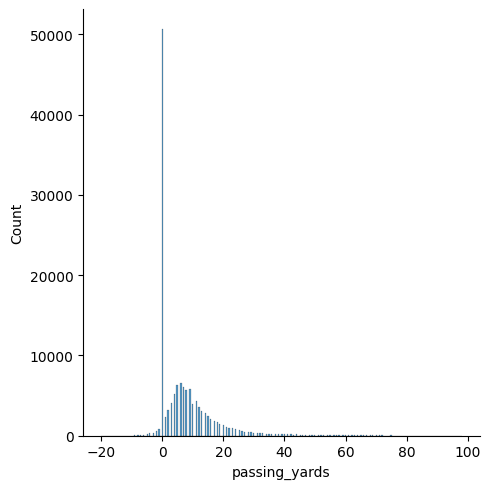

In [14]:
sns.displot(data=df_passes, x="passing_yards");
plt.show();

## Yards Gained on Short Passes

In [15]:
sns.set_theme(style="whitegrid", palette="colorblind")
df_short_passes = df_passes.query("pass_length_air_yards == 'short'")

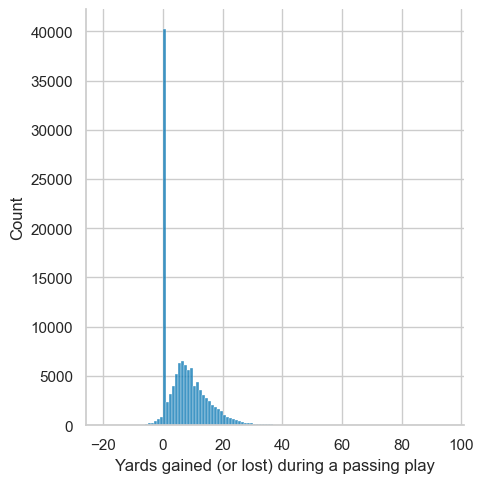

In [16]:
pass_hist_short = sns.displot(data=df_short_passes, binwidth=1, x="passing_yards")
pass_hist_short.set_axis_labels("Yards gained (or lost) during a passing play", "Count");
plt.show();

# Yards Gained on Long Passes

In [17]:
sns.set_theme(style="whitegrid", palette="colorblind")
df_long_passes = df_passes.query("pass_length_air_yards == 'long'")

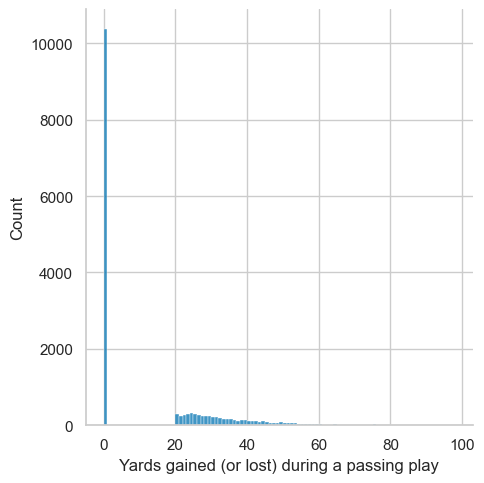

In [18]:
pass_hist_long = sns.displot(data=df_long_passes, binwidth=1, x="passing_yards")
pass_hist_long.set_axis_labels("Yards gained (or lost) during a passing play", "Count");
plt.show();

# Boxplot of Yards Gained (Passing)

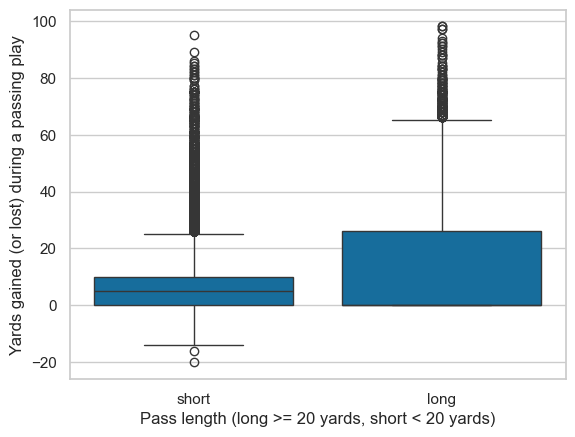

In [19]:
pass_boxplot = sns.boxplot(data=df_passes, x="pass_length_air_yards", y="passing_yards");
pass_boxplot.set(
    xlabel="Pass length (long >= 20 yards, short < 20 yards)", 
    ylabel="Yards gained (or lost) during a passing play",
);
plt.show();